## Code By - Naresh Kumar

## Task 5: Exploratory Data Analysis - Sports

### Problem Statement:
- To Perform Exploratory Data Analysis on 'Indian Premiere League' <br>

- As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.<br>

- To Suggest teams or players a company should endorse for its products.<br>

### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Datasets

In [2]:
matches = pd.read_csv("matches.csv")

In [3]:
deliveries = pd.read_csv("deliveries.csv")

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Merging 2 datasets

In [6]:
#merging the 2 datasets
merge = pd.merge(deliveries,matches, left_on='match_id', right_on ='id')
merge.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


### Check if id is unique or not

In [7]:
matches.id.is_unique

True

### Since id is unique we can set this as our index

In [8]:
matches.set_index('id', inplace=True)

## Data Preprocessing

In [9]:
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
matches.shape

(756, 17)

In [11]:
#To find the unique variables
def count_unique_values(matches):
    return pd.Series(matches.nunique(dropna=False))

count_unique_values(matches)

season              12
city                33
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              16
win_by_runs         89
win_by_wickets      11
player_of_match    227
venue               41
umpire1             62
umpire2             66
umpire3             26
dtype: int64

In [12]:
matches.isnull().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

### Observations:

- city has 7 missing values

- umpire1 and umpire2 have 2 missing value each

- umpire3 has 637 missing values

- winner and player_of_match have 4 missing values

- city has 33 distinct values while venue has 41 distinct values

## Filling Missing Values

- Matching cities with null value with venue

In [13]:
matches[matches.city.isnull()][['city','venue']]

,city,venue
id,,
462,NaN,Dubai International Cricket Stadium
463,NaN,Dubai International Cricket Stadium
467,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
470,NaN,Dubai International Cricket Stadium
475,NaN,Dubai International Cricket Stadium
477,NaN,Dubai International Cricket Stadium


In [14]:
#Filling missing values with Dubai
matches.city = matches.city.fillna('Dubai')

- umpire1 and umpire2 columns have 2 missing value each.

In [15]:
matches[(matches.umpire1.isnull())]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [16]:
matches[(matches.umpire2.isnull())]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


- Umpire3 column has a lot of missing values so dropping it !

In [17]:
matches = matches.drop('umpire3', axis = 1)

In [18]:
#Let's find out venues grouped by cities to see which cities have multiple venues

city_venue = matches.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

### Observations:
- Bengaluru and Bangalore are same.
- Chandigarh has 2 venues of the same name "Mohali".

## Exploratory Data Analysis

### Visual representation of number of venues in each city .

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

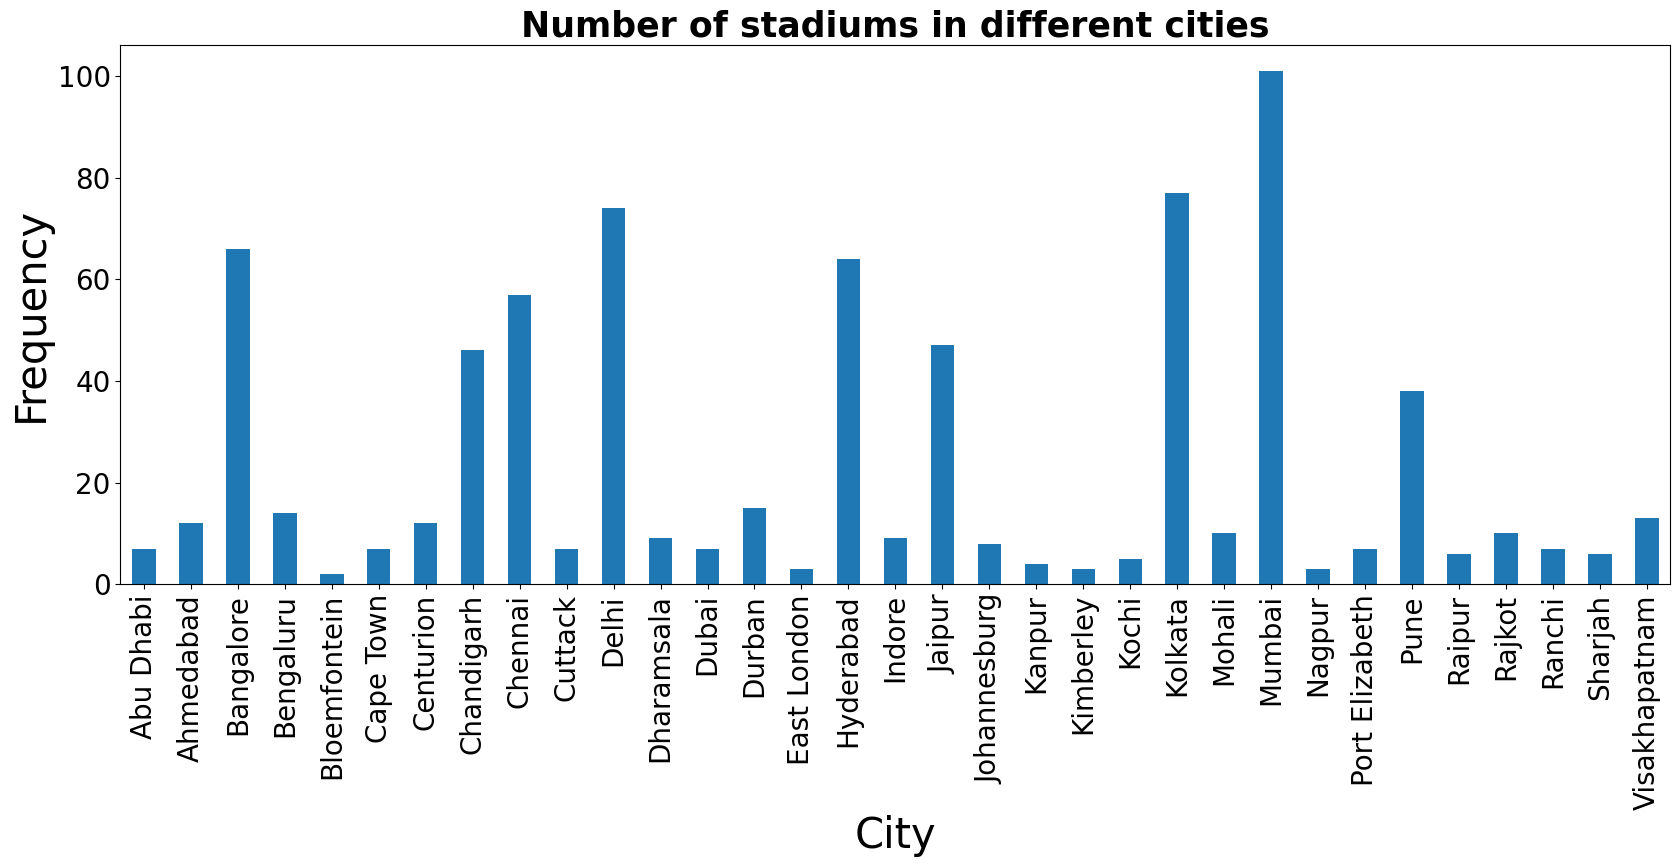

In [20]:
#Plotting venues along with cities 
v = pd.crosstab(matches['city'],matches['venue'])


#Adding a column by summing each columns
v['count'] = v.sum(axis = 'columns')

#We will just keep last column = 'count'
b = v['count']

#Plotting
plt.figure(figsize = (20,7))
b.plot(kind = 'bar')
plt.title("Number of stadiums in different cities", fontsize = 25, fontweight = 'bold')
plt.xlabel("City", size = 30)
plt.ylabel("Frequency", size = 30)
plt.xticks(size = 20)
plt.yticks(size = 20)

- Crosstab: Compute a simple cross tabulation of two (or more) factors. 
  By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.
  **The pandas crosstab function builds a cross-tabulation table that can show the frequency with which certain groups of data appear.**
  
### Observation:
- Mumbai has the highes no. of stadiums.

### Number of matches played in each season 

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

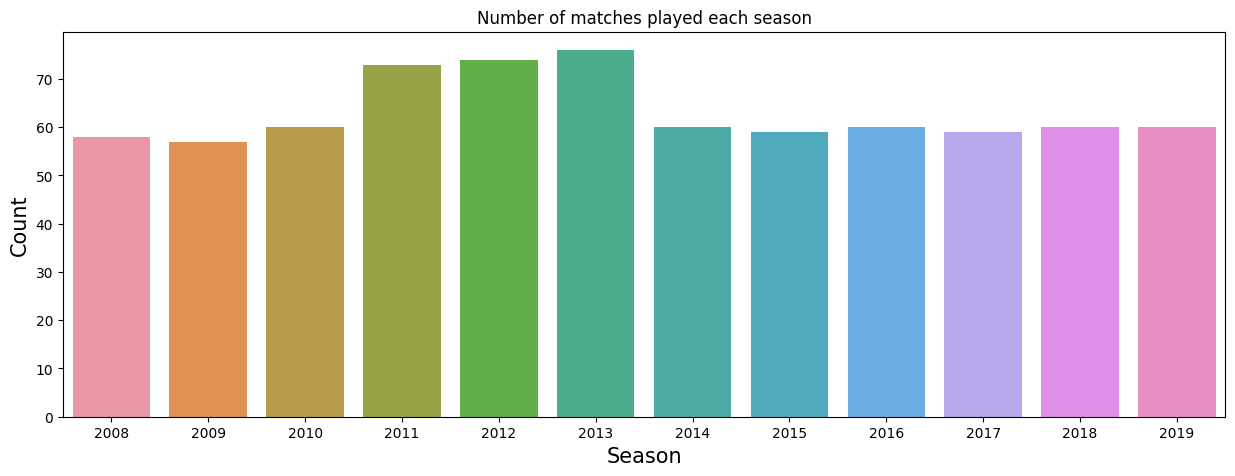

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(x='season', data = matches)
plt.title("Number of matches played each season")
plt.ylabel("Count", size = 15)
plt.xlabel("Season", size = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)

### Observations:
- 2011-2013 have more matches being played than other seasons

- All other seasons have approximately 58-60 matches while 2011-2013 have more than 70 matches.

### No. of teams played in each season

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

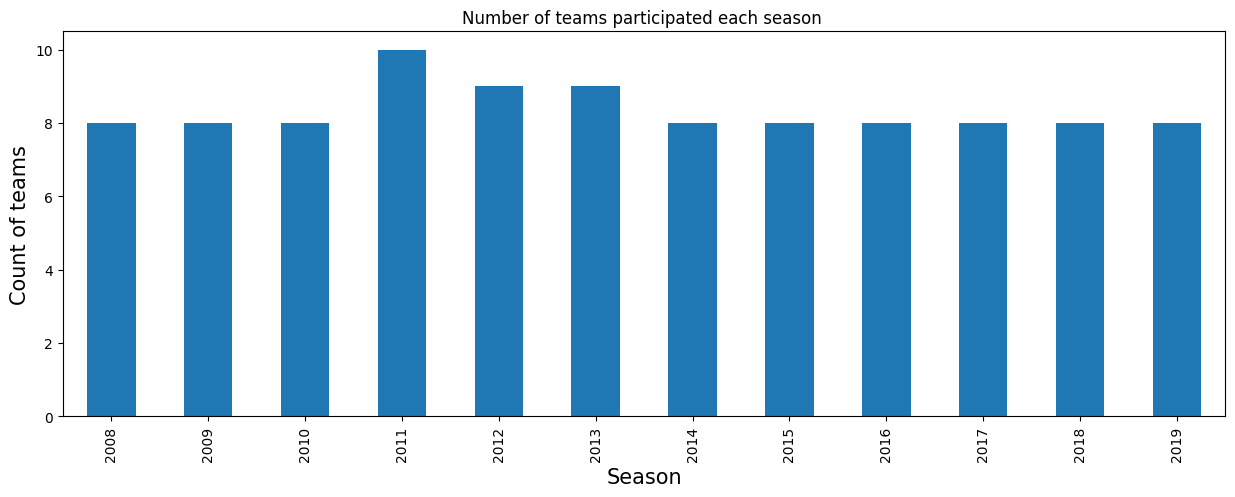

In [22]:
matches.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of teams participated each season ")
plt.ylabel("Count of teams", size = 15)
plt.xlabel("Season", size = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)

### Observations:
- 10 teams played in 2011 and 9 teams each in 2012 and 2013

- This explains why 2011-2013 have seen more matches being played than other seasons

### Venue which has hosted most number of IPL matches .

Text(0.5, 0, 'Frequency')

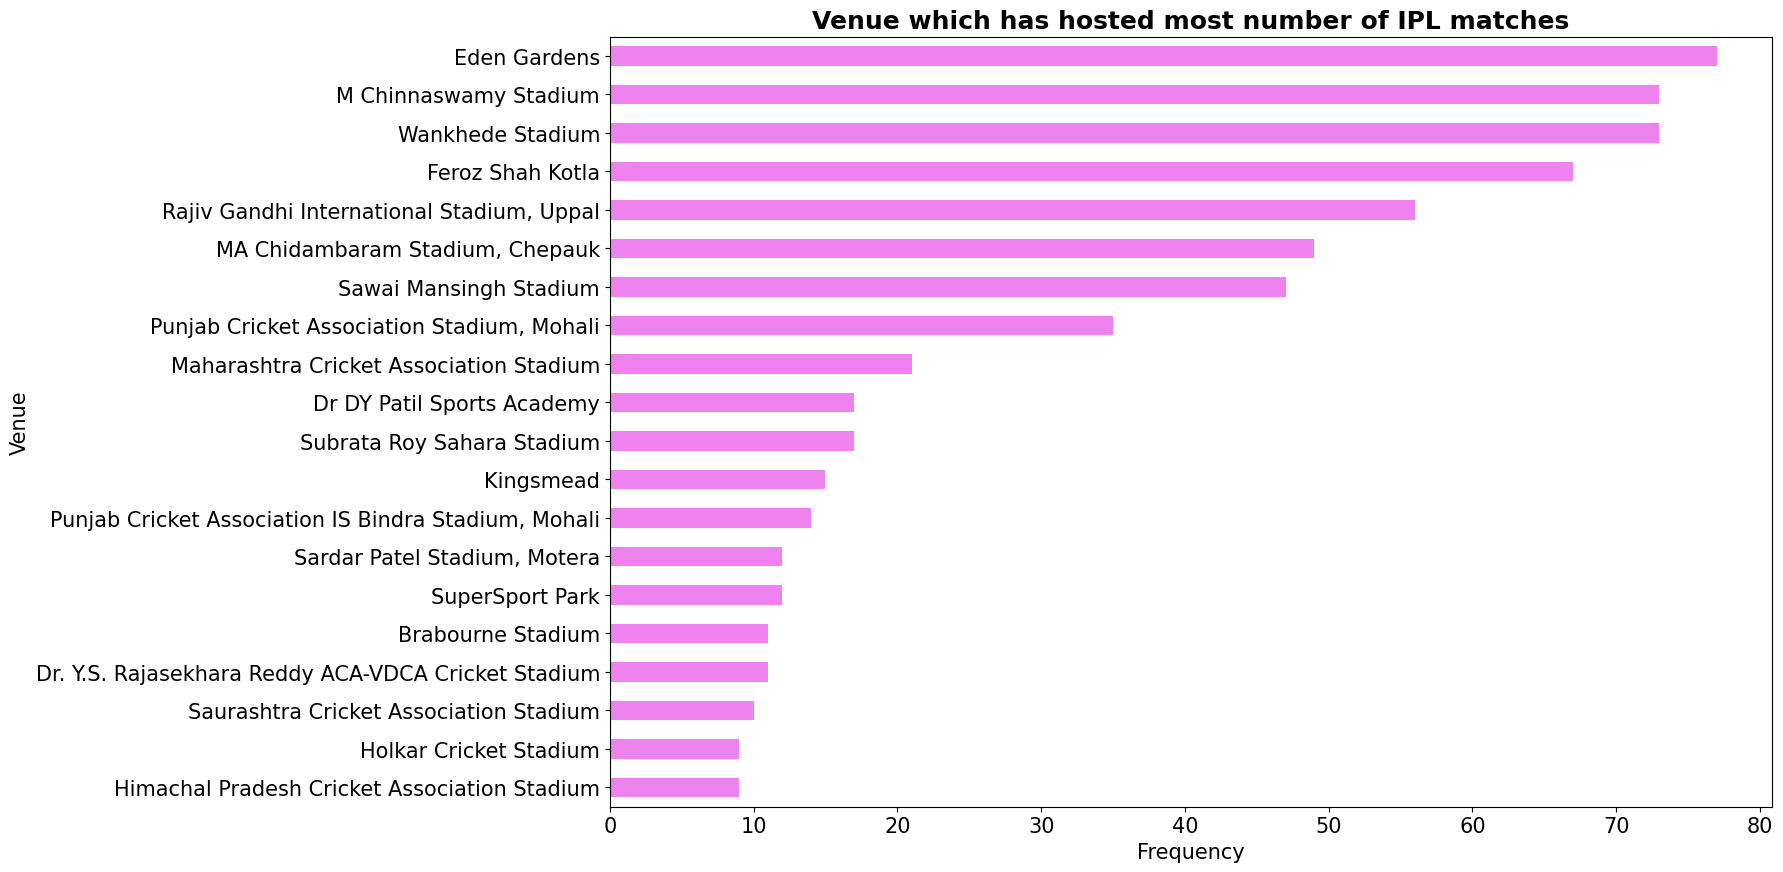

In [23]:
matches.venue.value_counts().sort_values(ascending = True).tail(20).plot(kind = 'barh',figsize=(15,10), fontsize=15, color='violet')
plt.title("Venue which has hosted most number of IPL matches",fontsize=18,fontweight="bold")
plt.ylabel("Venue", size = 15)
plt.xlabel("Frequency", size = 15)

### Observation:
- Eden Gardens has hosted the highest no. of matches in IPl.

### Venue which has hosted least number of IPL matches .

Text(0.5, 0, 'Frequency')

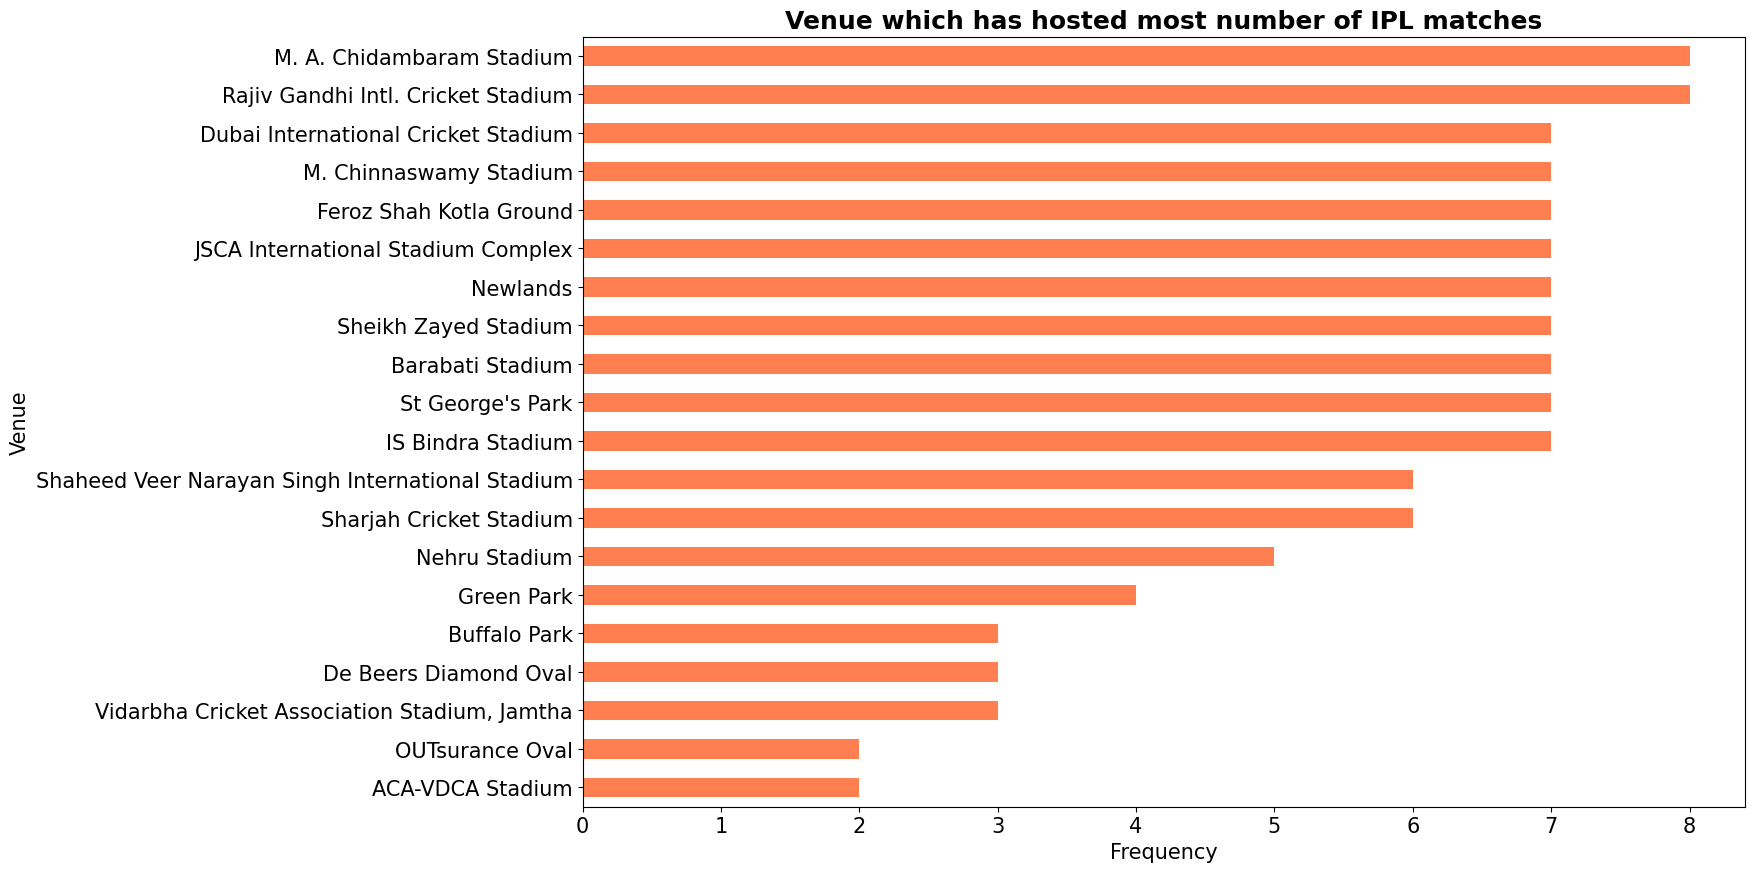

In [24]:
matches.venue.value_counts().sort_values(ascending = True).head(20).plot(kind = 'barh',figsize=(15,10), fontsize=15, color='coral')
plt.title("Venue which has hosted most number of IPL matches",fontsize=18,fontweight="bold")
plt.ylabel("Venue", size = 15)
plt.xlabel("Frequency", size = 15)

### Observation:
- ACA-VDCA and OUTsurance Oval Stdium has hosted the least no. of matches in IPl.

### Team which got Max wins

In [25]:
#creating a dataframe with season and winner columns
winning = matches[['season','winner']]
winning.head(20)

,season,winner
id,,
1,2017,Sunrisers Hyderabad
2,2017,Rising Pune Supergiant
3,2017,Kolkata Knight Riders
4,2017,Kings XI Punjab
5,2017,Royal Challengers Bangalore
6,2017,Sunrisers Hyderabad
7,2017,Mumbai Indians
8,2017,Kings XI Punjab
9,2017,Delhi Daredevils


In [26]:
#dictionaries to get winners to each season
winning_team = {}
for i in sorted(winning.season.unique()):
    winning_team[i] = winning[winning.season == i]['winner'].tail(1).values[0]
    print(winning_team[i])

#tail means the winning team(the one who won the last match), values[0] represents the name of the winnning team

Rajasthan Royals
Deccan Chargers
Chennai Super Kings
Chennai Super Kings
Kolkata Knight Riders
Mumbai Indians
Kolkata Knight Riders
Mumbai Indians
Sunrisers Hyderabad
Mumbai Indians
Chennai Super Kings
Mumbai Indians


In [27]:
winning_team

{2008: 'Rajasthan Royals',
 2009: 'Deccan Chargers',
 2010: 'Chennai Super Kings',
 2011: 'Chennai Super Kings',
 2012: 'Kolkata Knight Riders',
 2013: 'Mumbai Indians',
 2014: 'Kolkata Knight Riders',
 2015: 'Mumbai Indians',
 2016: 'Sunrisers Hyderabad',
 2017: 'Mumbai Indians',
 2018: 'Chennai Super Kings',
 2019: 'Mumbai Indians'}

In [28]:
#Converting winning_team into a dataframe
winners_of_IPL = pd.Series(winning_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(0, 1, 'Chennai Super Kings'),
  Text(0, 2, 'Kolkata Knight Riders'),
  Text(0, 3, 'Sunrisers Hyderabad'),
  Text(0, 4, 'Deccan Chargers'),
  Text(0, 5, 'Rajasthan Royals')])

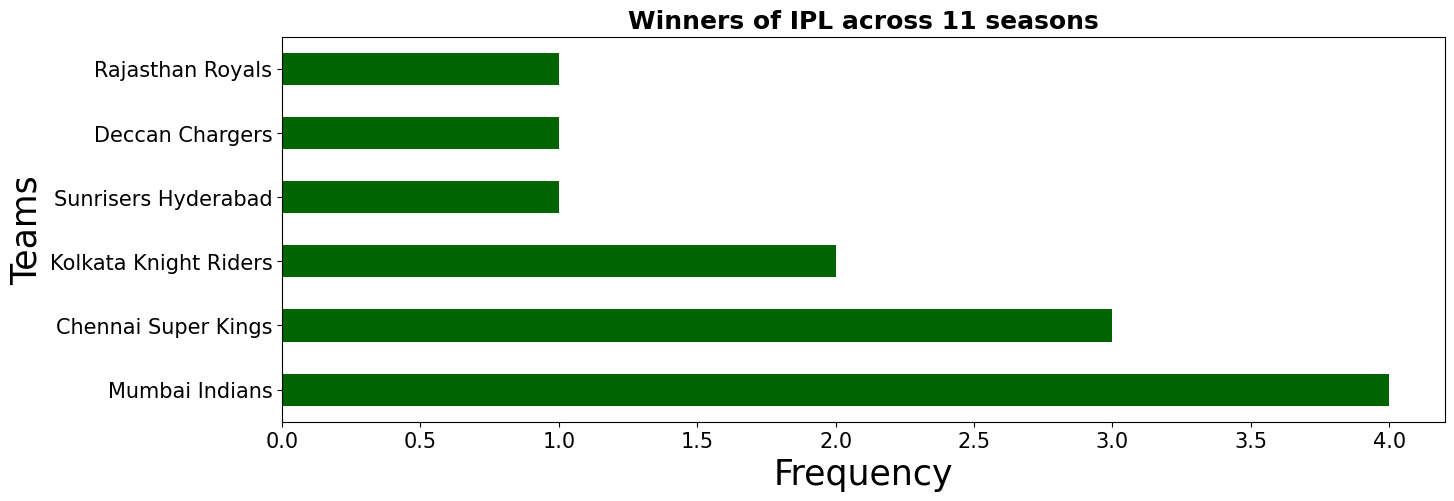

In [29]:
#Now plotting

winners_of_IPL['team'].value_counts().plot(kind = 'barh', figsize = (15,5), color = 'darkgreen')
plt.title("Winners of IPL across 11 seasons",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

### Observations:
- MI won 4 times(highest) followed by CSK with 3 wins.
- Hyderabad team has also won 2 times(combined) under 2 franchise name - Deccan Chargers and Sunrisers Hyderabad

### Bat or field first after winning the toss?

<AxesSubplot:ylabel='toss_decision'>

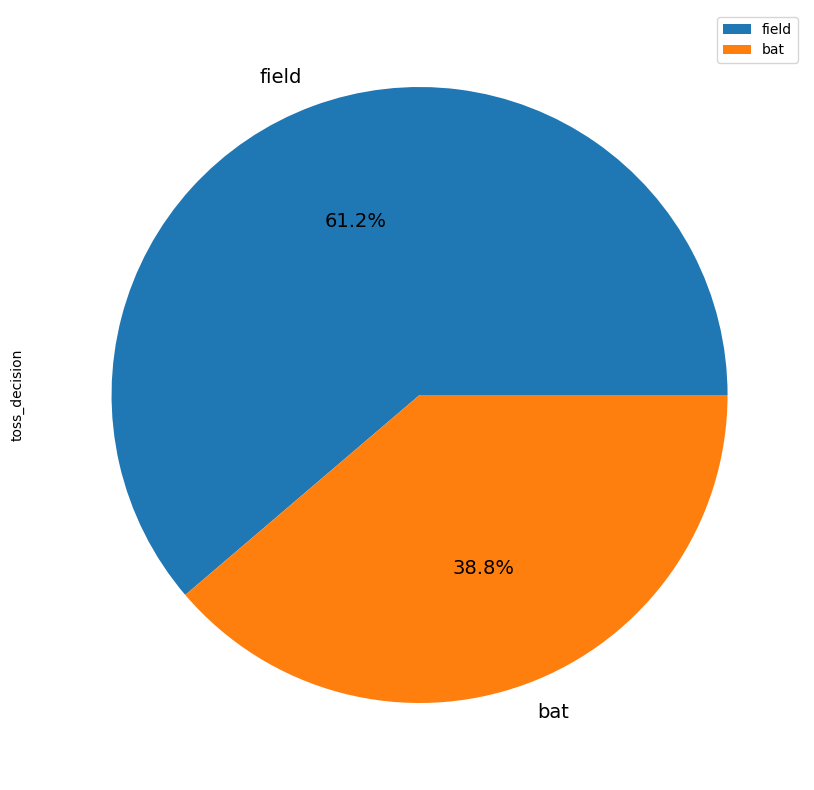

In [30]:
matches['toss_decision'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), legend=True)

### Observation:
- 61.2% times teams who have won tosses have decided to field

### How toss decision affects match results?

Text(0, 0.5, 'Frequency')

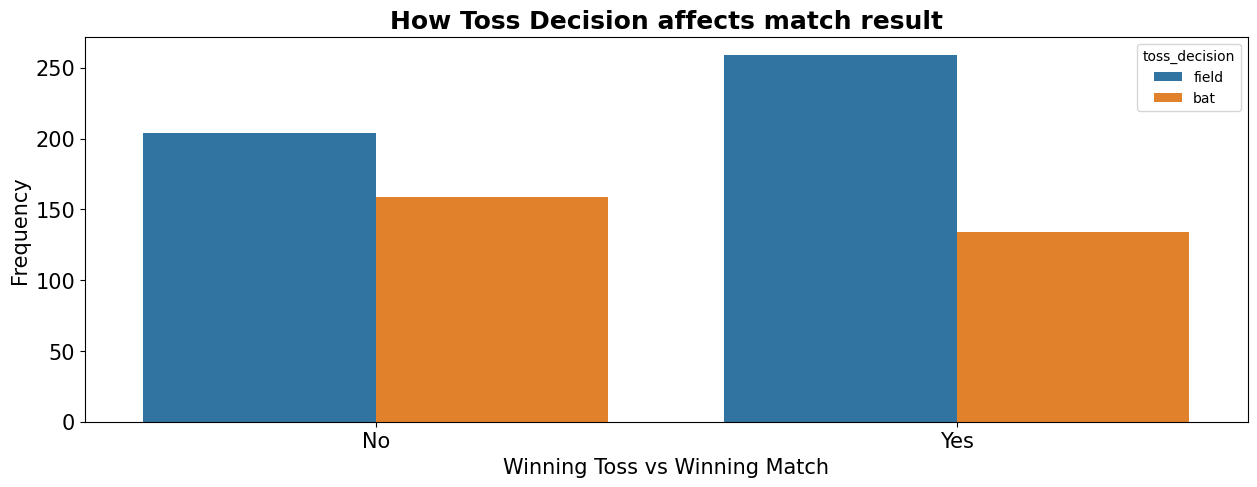

In [31]:
matches['toss_win_game_win'] = np.where((matches.toss_winner == matches.winner),'Yes','No')
#If the teams win both toss and the match then Yes else No

plt.figure(figsize = (15,5))
sns.countplot(x='toss_win_game_win', data=matches, hue = 'toss_decision')
plt.title("How Toss Decision affects match result", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Winning Toss vs Winning Match", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)

### Observation:
- Teams winning tosses and choosing to field first have won most number of times.

### Individual teams decision to choose bat or field after winning toss.

Text(0, 0.5, 'Count')

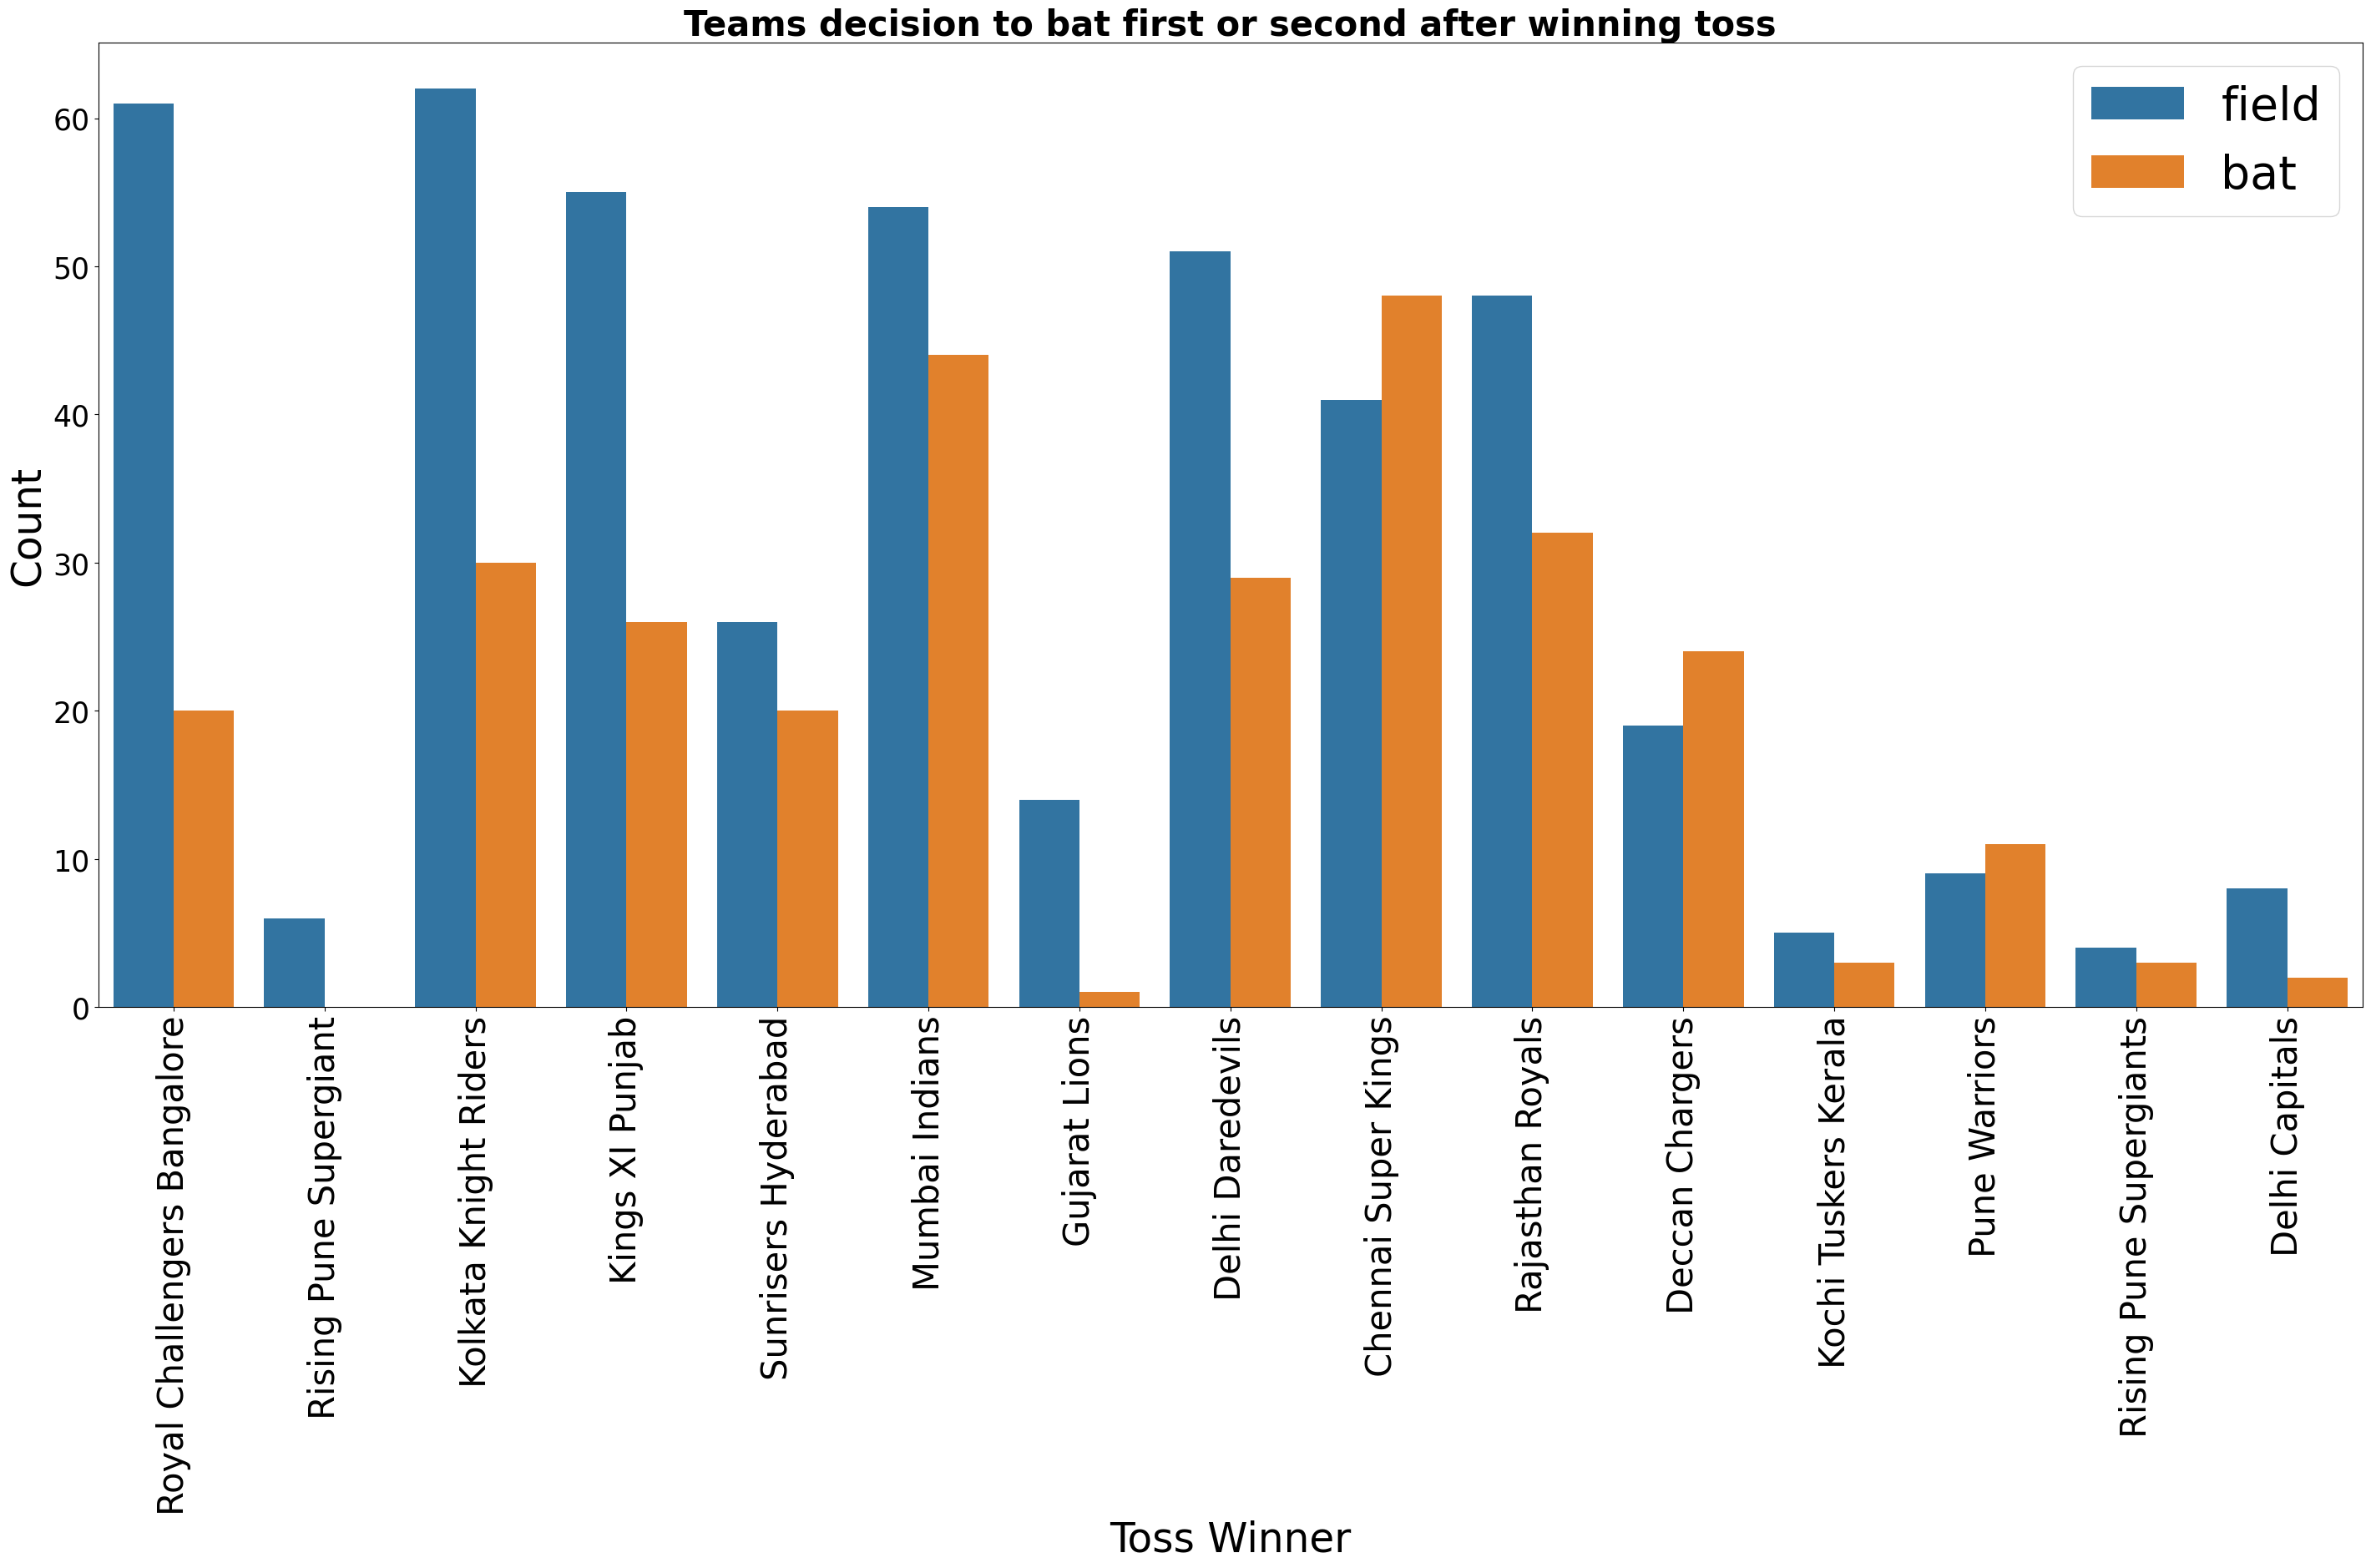

In [32]:
plt.figure(figsize = (35,15))
sns.countplot(x='toss_winner', data = matches, hue = 'toss_decision')
plt.title("Teams decision to bat first or second after winning toss", size = 30, fontweight = 'bold')
plt.legend(loc=1, prop={'size': 40})
plt.xticks(size = 30,rotation='vertical')
plt.yticks(size = 25)
plt.xlabel("Toss Winner", size = 35)
plt.ylabel("Count", size = 35)

### Observation:
- Most teams field first after winning toss except for CSK,Deccan Charges and Pune Warriors.

### Which player's performance has mostly led team's win?

Text(0.5, 0, 'Players')

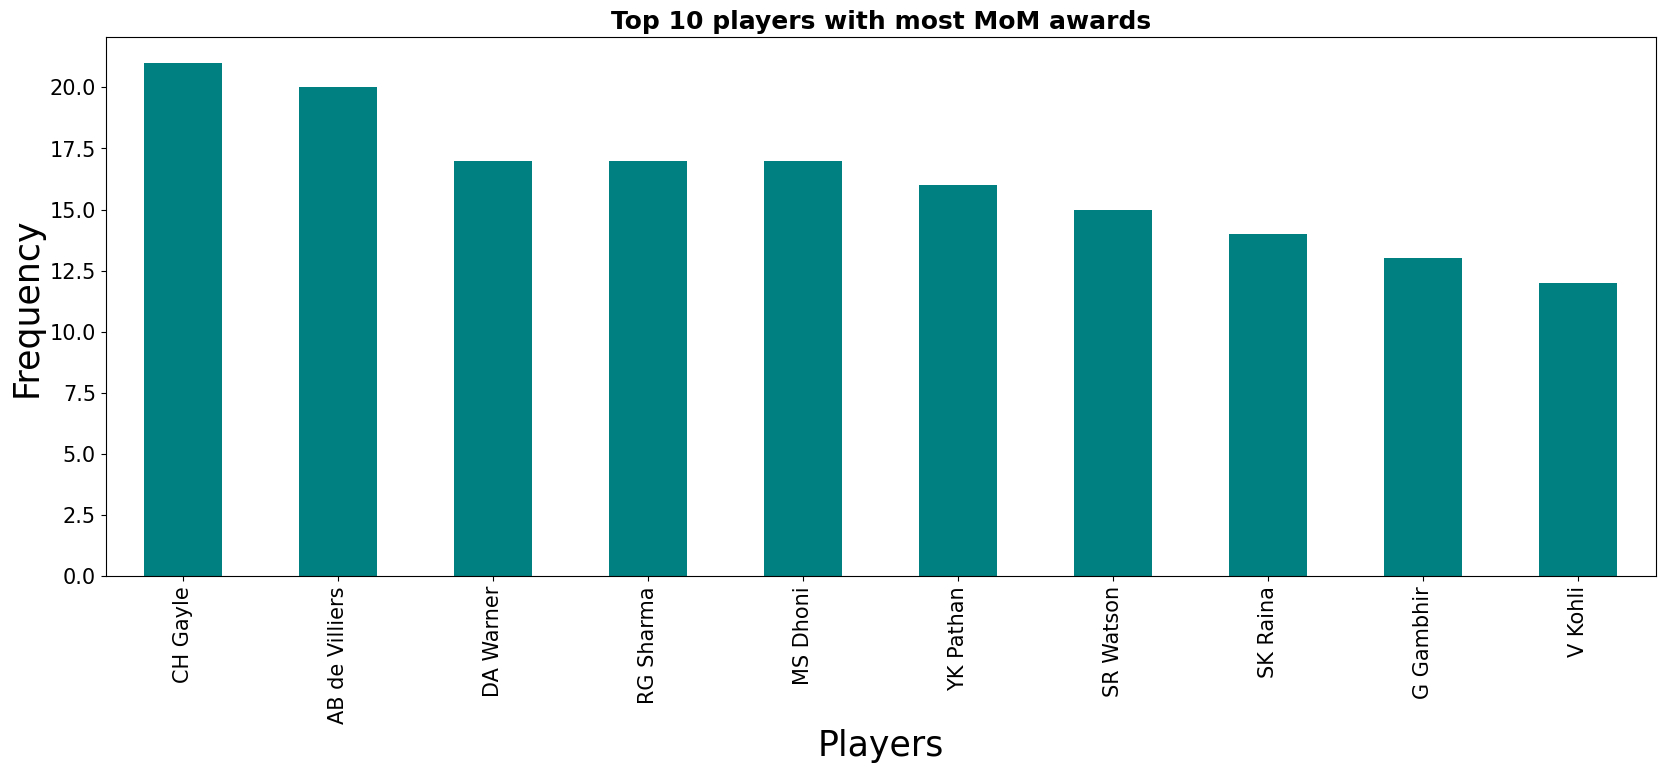

In [33]:
MoM= matches['player_of_match'].value_counts()
MoM.head(10).plot(kind = 'bar',figsize=(20,7), fontsize=15, color='Teal')
plt.title("Top 10 players with most MoM awards",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Players", size = 25)

### Observation:
- Chris Gayle has so far won the most number of "Man of the Match" awards followed by AB de Villiers.

### Choosing batting or bowling first leads a win?

Text(0, 0.5, 'Count')

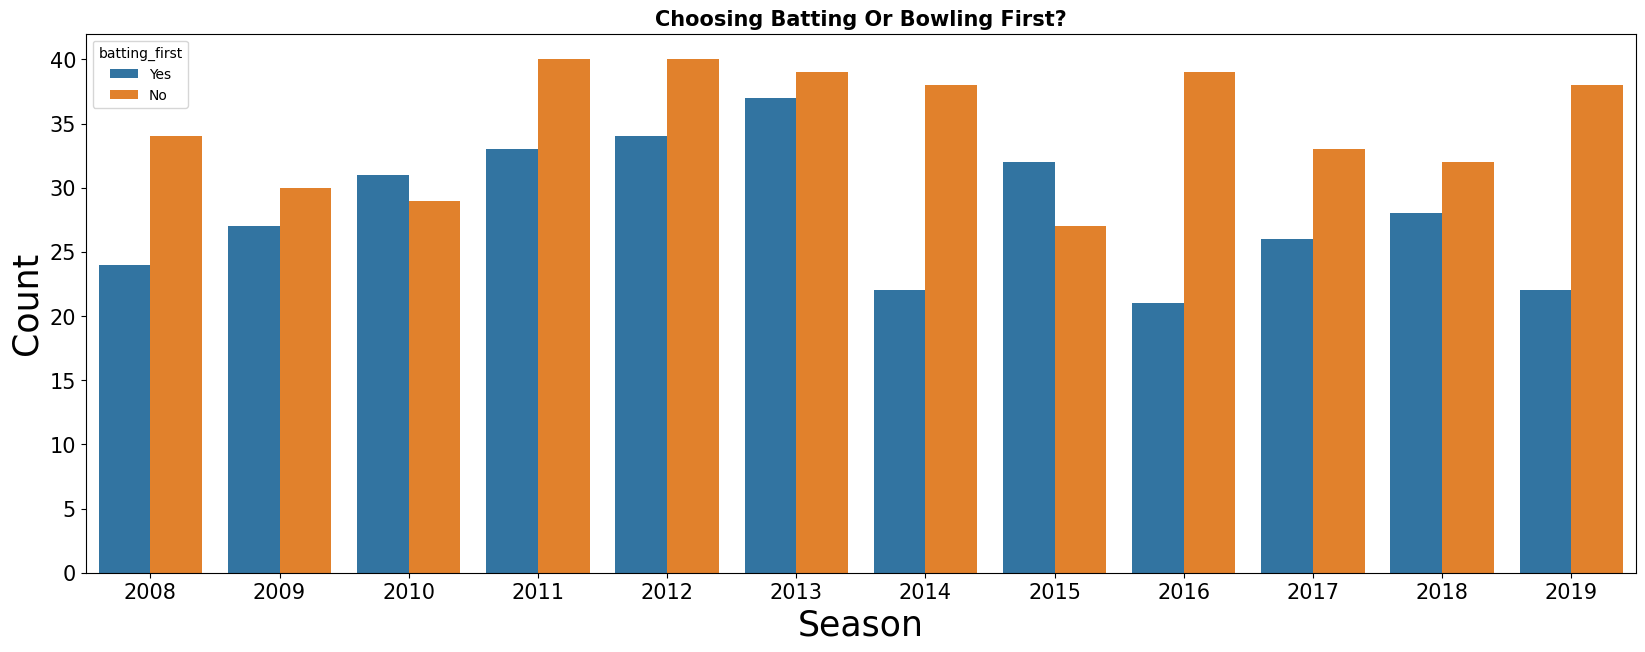

In [34]:
matches['batting_first'] = np.where((matches.win_by_runs > 0), 'Yes', 'No')
#Createing a feature where the team choose batting first and won

plt.figure(figsize = (20,7))
sns.countplot(x='season', data = matches, hue = 'batting_first')
plt.title("Choosing Batting Or Bowling First?", fontsize=15,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Season", fontsize = 25)
plt.ylabel("Count", fontsize = 25)

### Observations:
- Except for 2010 and 2015, in all other years it can be seen that teams batting second have won more matches

### Total scoring runs, over the years.

(array([15000., 16000., 17000., 18000., 19000., 20000., 21000., 22000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

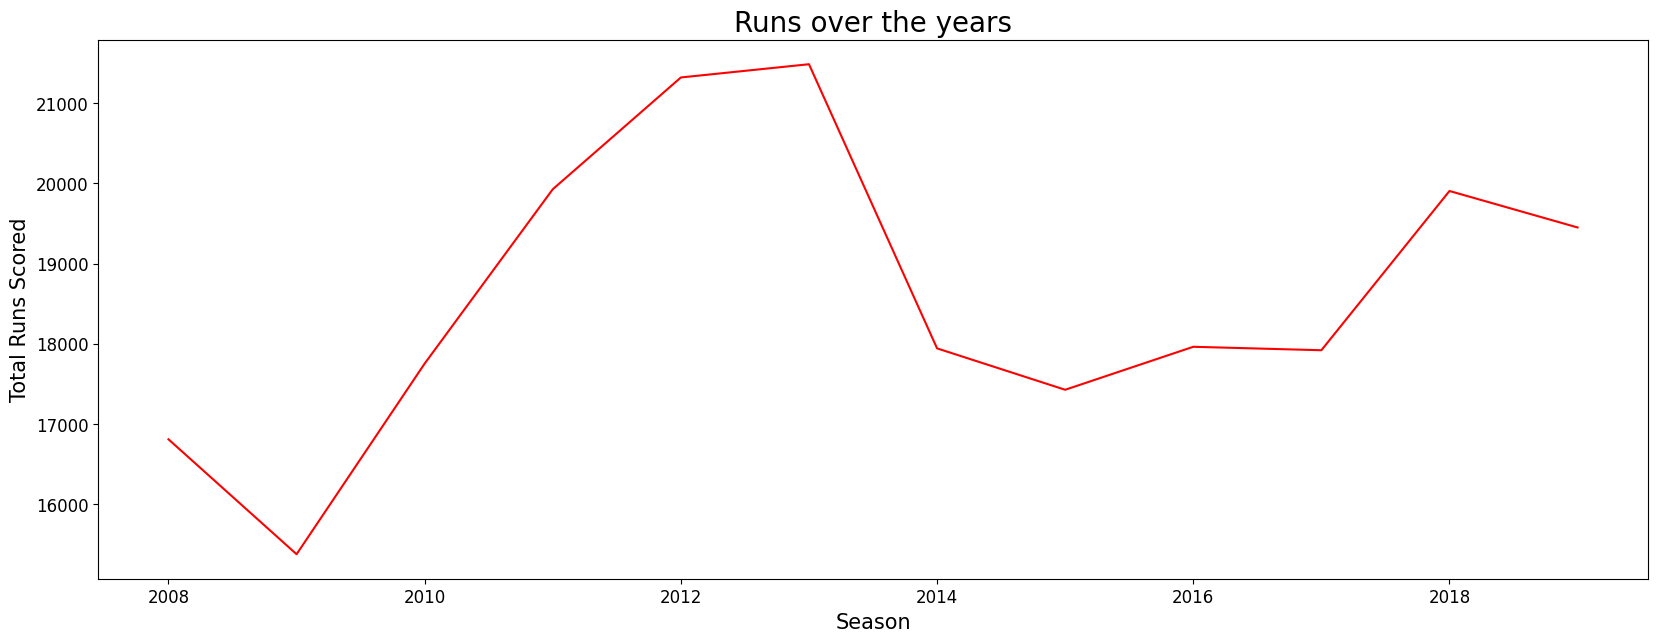

In [35]:
merge.groupby('season')['batsman_runs'].sum().plot(kind = 'line', figsize =(20,7),color = 'red')
plt.title("Runs over the years",fontsize= 20)
plt.xlabel("Season", size = 15)
plt.ylabel("Total Runs Scored", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)

### Observations:
- Highest runs recorded was in the year 2013.
- Run scoring has gone up from the start of the IPL in 2008.

### Top batsmen who got runs.

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

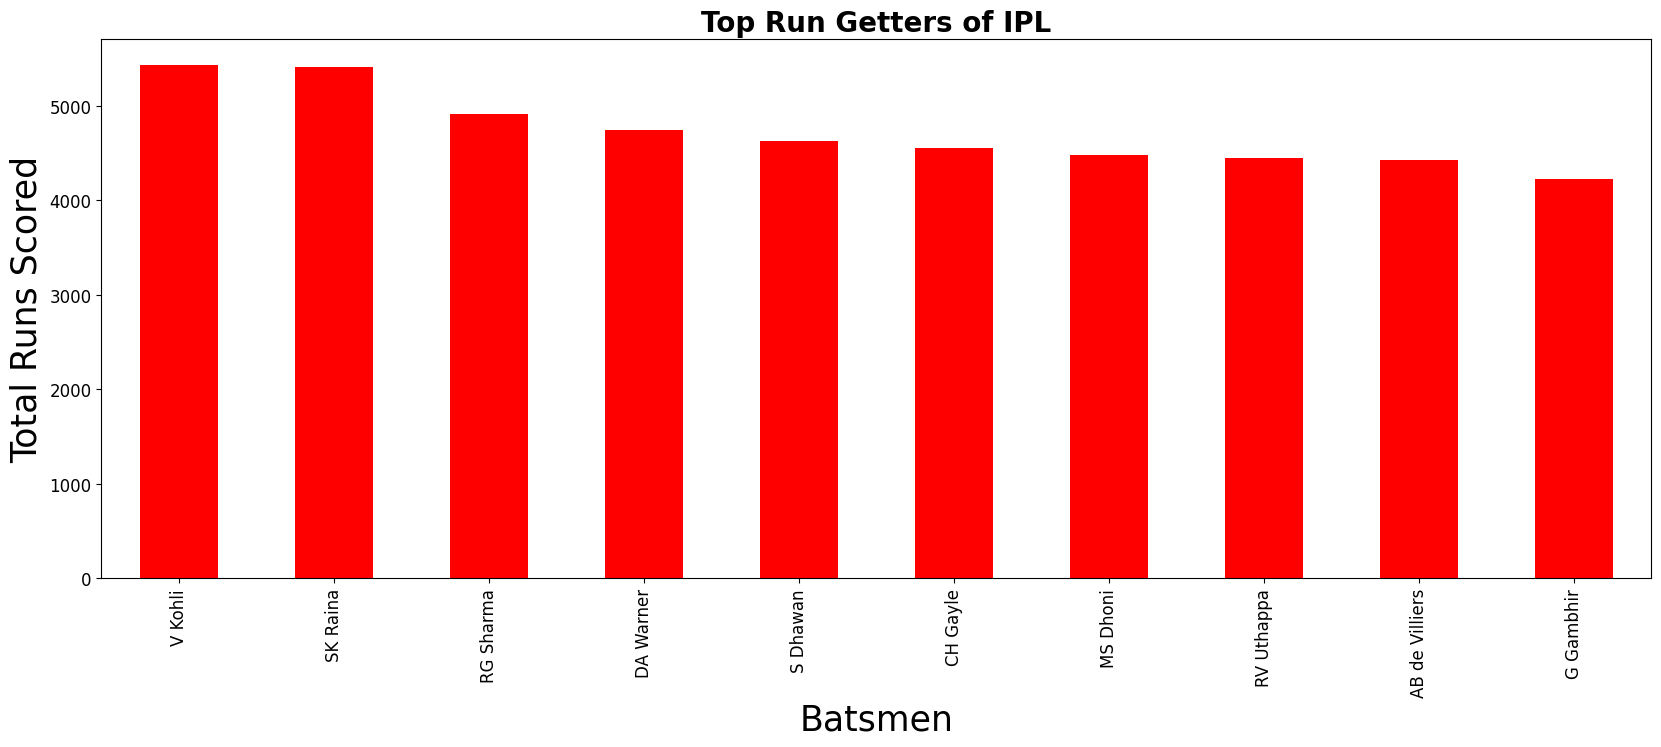

In [36]:
merge.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'red',figsize = (20,7))
plt.title("Top Run Getters of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

### Observations:
- Virat Kohli and Suresh Raina are the highest run getters in IPL.

### Making a dataset for top 10 batsmen

In [37]:
consistent_batsman = merge[merge.batsman.isin(['V Kohli','SK Raina','RG Sharma','DA Warner','S Dhawan','CH Gayle','MS Dhoni',
                                               'RV Uthappa','AB de Villiers','G Gambhir'])][['batsman','season','total_runs']]

### Which batsman has been most consistent among top 10 run getters?

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

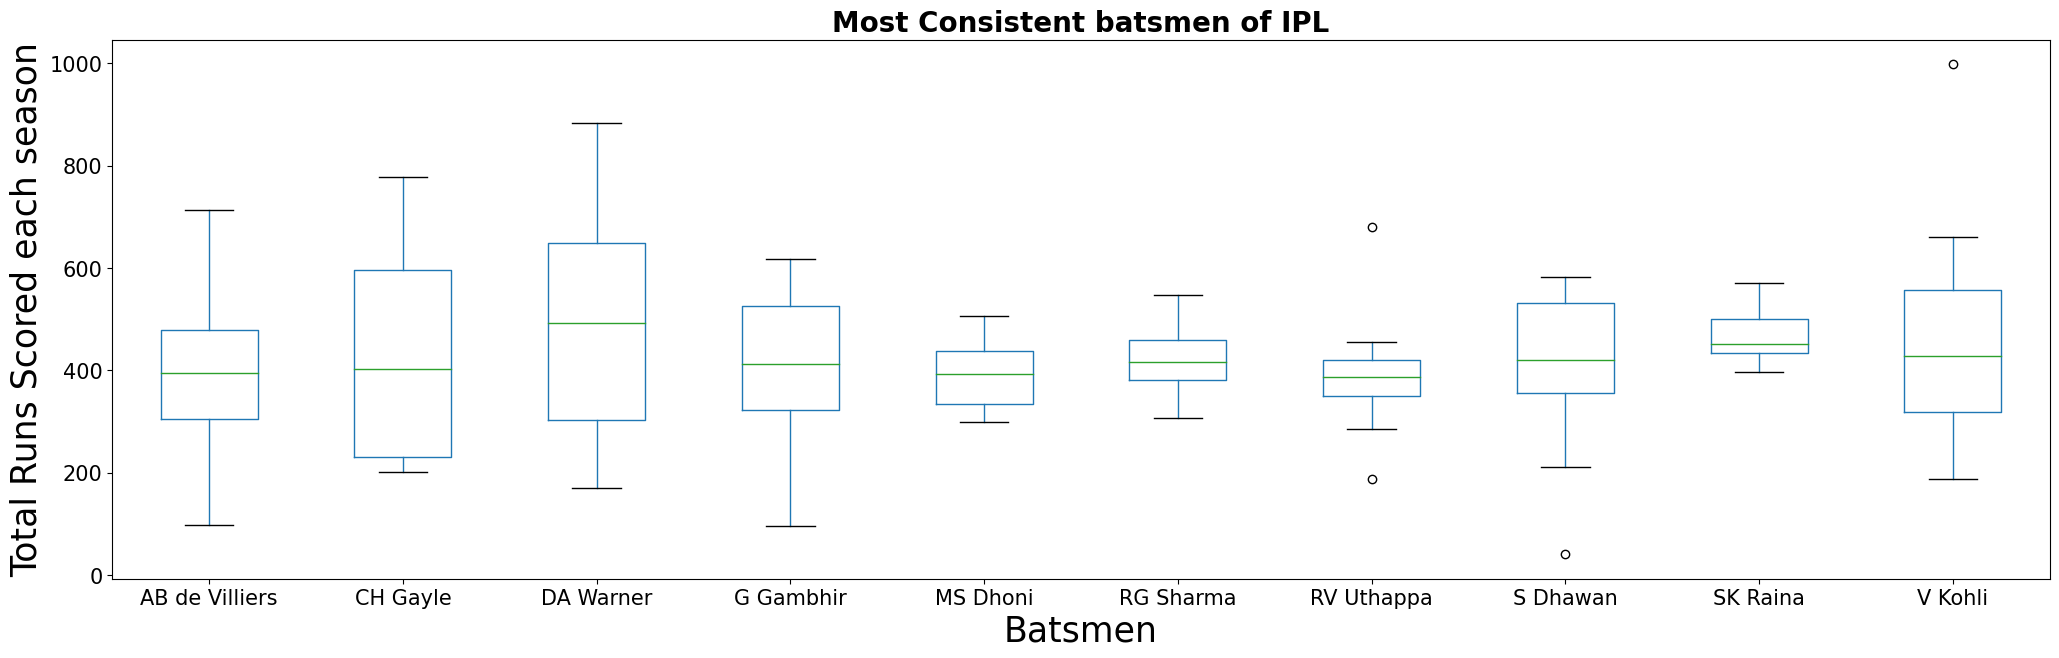

In [38]:
consistent_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (25,7))

#unstack()=Returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.
plt.title("Most Consistent batsmen of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored each season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

### Observations
- Median score for Raina is above all the top run getters.
- He has the highest lowest run among all the batsmen across all seasons.

### Best bowlers ?

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

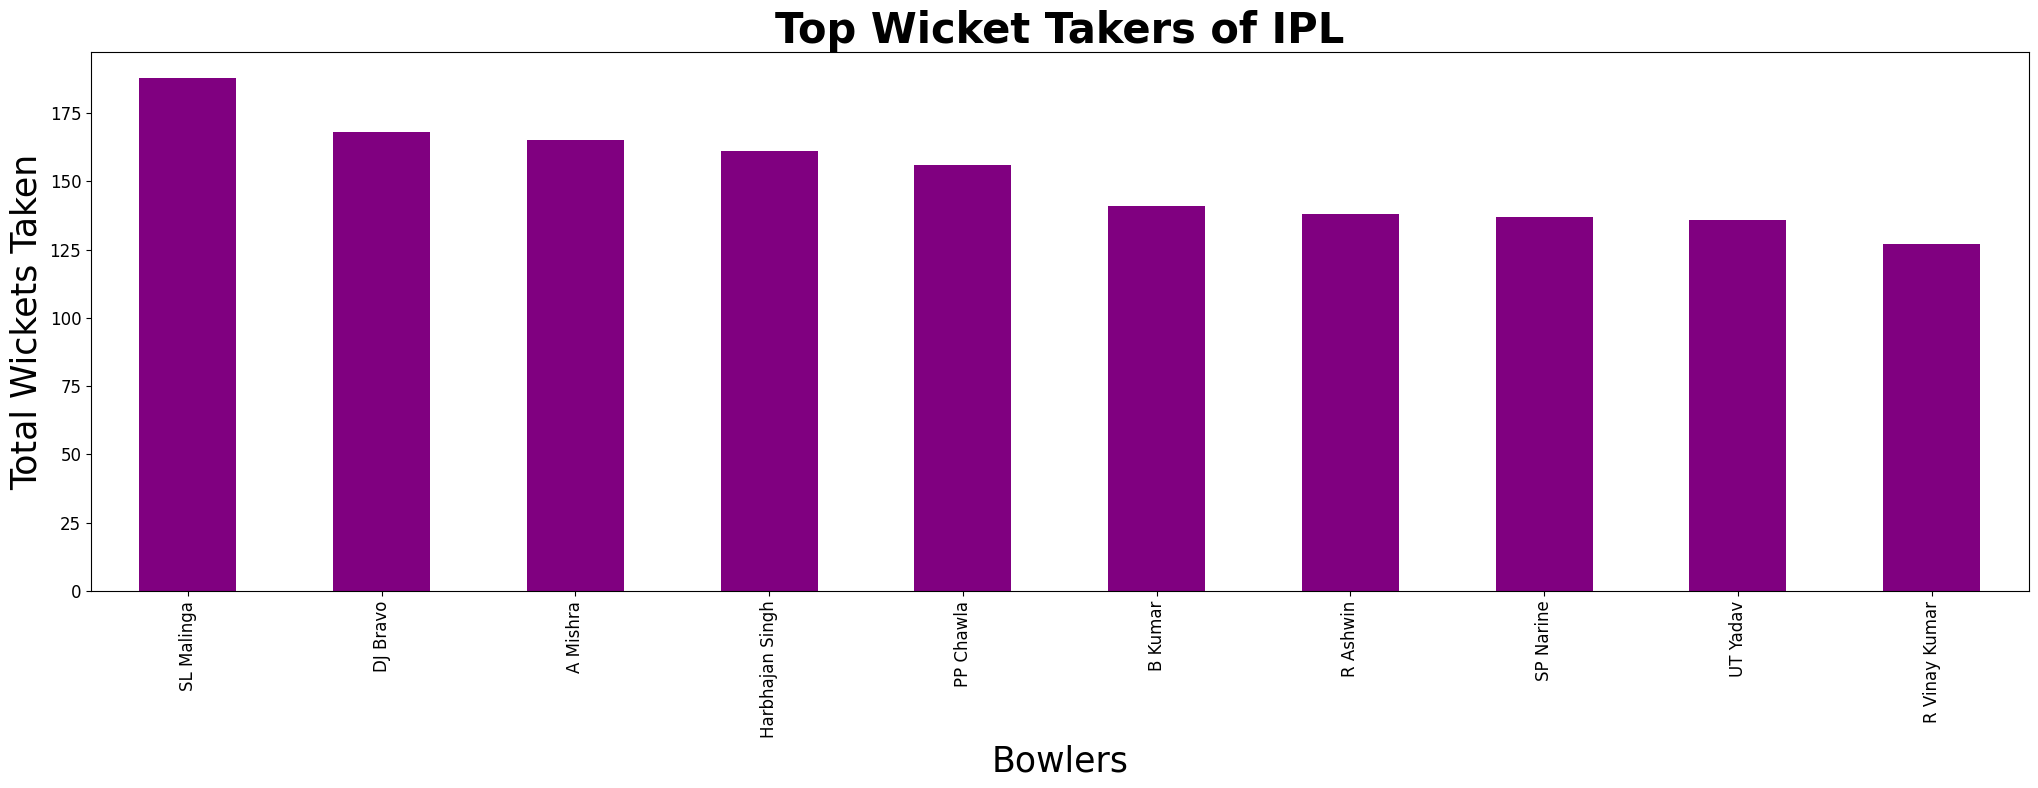

In [39]:
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar',color = 'purple', figsize = (25,7))
plt.title("Top Wicket Takers of IPL", fontsize = 30, fontweight = 'bold')
plt.xlabel("Bowlers", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

### Observations:
- Malinga has taken the most number of wickets in IPL followed by Bravo and Amit Mishra
- In top 10 bowlers, 5 are fast and medium pacers while the other 5 are spinners

### Most consistent bowlers

In [40]:
#balls bowled by wickets taken
balls_bowled = pd.DataFrame(merge.groupby('bowler')['ball'].count())
wickets_taken = pd.DataFrame(merge[merge['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(merge.groupby('bowler')['season'].nunique())
bowler_strike_rate = pd.DataFrame({'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season']})
bowler_strike_rate.reset_index(inplace = True)

In [41]:
bowler_strike_rate['strike_rate'] = bowler_strike_rate['balls']/bowler_strike_rate['wickets']
def highlight_cols(s):
    color = 'skyblue'
    return 'background-color: %s' % color
#Strike rate for bowlers who have taken more than 50 wickets
best_bowling_strike_rate = bowler_strike_rate[bowler_strike_rate['wickets'] > 50].sort_values(by = 'strike_rate', ascending = True)
best_bowling_strike_rate.head().style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['bowler', 'wickets','strike_rate']])

,bowler,balls,wickets,season,strike_rate
134,Imran Tahir,1249,82,6,15.231707
340,SL Malinga,2974,188,9,15.819149
93,DJ Bravo,2711,168,10,16.136905
9,A Nehra,1974,121,9,16.314050
225,MM Patel,1382,82,7,16.853659


### Observations:
- MM Patel is the most consistent bowler followed by A.Nehra and DJ Bravo. The all have a strike rate(balls bowled/wickets taken) of above 16.0

### Q1. As a sports analysts, The most successful teams, players & factors contributing win or loss of a team:

- Mumbai Indians is the most successful team in IPL and has won the most number of toss.
- MI won 4 times(highest) followed by CSK with 3 wins.
- Hyderabad team has also won 2 times(combined) under 2 franchise name - Deccan Chargers and Sunrisers Hyderabad
- 61.2% times teams who have won tosses have decided to field.
- Teams winning tosses and choosing to field first have won most number of times.
- Highest runs recorded was in the year 2013.
- Run scoring has gone up from the start of the IPL in 2008.
- Chris Gayle has won the maximum number of player of the match title.
- Eden Gardens has hosted the maximum number of IPL matches.

### Q2. Teams or Players a company should endorse for its products.

#### Batsmen:
- If the franchise is looking for a game changing batsman then go for Chris Gayle, AB deVillers, R Sharma , MS Dhoni.
- If the franchise is looking for a batsman who needs to score good amount of runs then go for V Kohli, S Raina, Rohit Sharma , David Warner.
- If the franchise is looking for a reliable batsman then go for SK Raina, R Sharma, S Dhawan, MS dhoni.<br>

#### Bowlers:
- If the franchise need a wicket taking bowler then go for SL Malinga,DJ Bravo,A Mishra ,Harbhajan Singh, PP Chawla.
- If the franchise need a consistent bowler with good runs per wicket then go for MM Patel, A Nehra, DJ Bravo, SL Malinga.

## Thankyou, Feedbacks Are Always Welcome !